In [1]:
#importing libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler


In [2]:
beer = pd.read_csv('data/recipeData.csv', index_col='BeerID', encoding='latin1')

In [3]:
beer.shape

(73861, 21)

In [143]:
beer.columns

Index(['Name', 'URL', 'Style', 'StyleID', 'Size(L)', 'OG', 'FG', 'ABV', 'IBU',
       'Color', 'BoilSize', 'BoilTime', 'BoilGravity', 'Efficiency',
       'MashThickness', 'SugarScale', 'BrewMethod', 'PitchRate', 'PrimaryTemp',
       'PrimingMethod', 'PrimingAmount', 'IPA', 'Pale Ale', 'Light Lager',
       'Lager', 'Stout-Porter', 'Weissbier', 'kind'],
      dtype='object')

In [4]:
beer.head()

,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,...,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount
BeerID,,,,,,,,,,,,,,,,,,,,,
1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,4.83,...,75,1.038,70.0,NaN,Specific Gravity,All Grain,NaN,17.78,corn sugar,4.5 oz
2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,15.64,...,60,1.070,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN
3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7,18.93,1.063,1.018,5.91,59.25,8.98,...,60,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,NaN,NaN
4,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,American IPA,7,22.71,1.061,1.017,5.80,54.48,8.50,...,60,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN
5,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgis...,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,4.57,...,90,1.050,72.0,NaN,Specific Gravity,All Grain,NaN,19.00,Sukkerlake,6-7 g sukker/l


In [5]:
stylecounts = pd.DataFrame(beer['Style'].value_counts().reset_index())
stylecounts.loc[stylecounts['Style']>400,:]


,index,Style
0,American IPA,11940
1,American Pale Ale,7581
2,Saison,2617
3,American Light Lager,2277
4,American Amber Ale,2038
5,Blonde Ale,1753
6,Imperial IPA,1478
7,American Stout,1268
8,Irish Red Ale,1204
9,American Brown Ale,1152


In [6]:
#a = beer['Imperial IPA'] = (beer['Style'].str.contains('Imperial IPA'or'Double IPA'))*'Imperial IPA '


In [7]:
#b = beer['Black IPA'] = (beer['Style'].str.contains('Black IPA'))*'Black IPA '

In [8]:
v = beer['IPA'] = (beer['Style'].str.contains(' IPA'))*'IPA'


In [9]:
c = beer['Pale Ale'] = (beer['Style'].str.contains('Pale Ale'))*'Pale Ales' 

In [10]:
d = beer['Light Lager'] = (beer['Style'].str.contains('Light Lager'))*'Light '

In [11]:
o = beer['Lager'] = (beer['Style'].str.contains(' Lager|Common |Steam '))*'Lager'

In [12]:
#e = beer['Blonde Ale'] = (beer['Style'].str.contains('Blonde Ale' or 'Blond Ale'or 'Cream Ale'))*'Blonde '

In [13]:
f = beer['Pale Ale'] = (beer['Style'].str.contains('Saison|Strong Bitter'))*'Pale Ales'

In [14]:
#g = beer['Oatmeal Stout'] = (beer['Style'].str.contains('Oatmeal Stout'))*'Oatmeal Stout '

In [15]:
#h = beer['Sweet Stout'] = (beer['Style'].str.contains('Sweet Stout' or 'Oatmeal Stout'))*'Sweet Stout '

In [16]:
#j = beer['Saison'] = (beer['Style'].str.contains('Saison'))*'Saison'

In [17]:
k = beer['Stout-Porter'] = (beer['Style'].str.contains(' Stout| Porter'))*'Stout-Porter' 

In [18]:
#m = beer['Ales'] = (beer['Style'].str.contains(' Ale'))*'Ales'

In [19]:
#l = beer['Brown Ale'] = (beer['Style'].str.contains('Brown Ale' or 'Dark Strong Ale' or 'Dark Ale'))*'Brown '

In [20]:
#n = beer['Ales'] = (beer['Style'].str.contains('Brown Ale|Strong Ale|Dark Ale|Red Ale|Amber Ale|Blonde Ale|Blond Ale|Cream Ale'))*'Ales'

In [21]:
q = beer['Weissbier'] = (beer['Style'].str.contains('Witbier|Weissbier|Weizenbier|Weizen/Weissbier'))*'Weissbier'

In [22]:
#s = beer['Kölsch'] = (beer['Style'].str.contains('Kölsch'))*'Kölsch'

In [23]:
#t = beer['Porter'] = (beer['Style'].str.contains(' Porter'))*'Porter'

In [24]:
#u = beer['Wheat beer'] = (beer['Style'].str.contains('Wheat Beer'))*'Wheat Beer'

In [25]:
beer['kind'] = c+d+f+k+o+q+v+''
beer['kind'].value_counts()

                27157
IPA             17064
Pale Ales       11963
Stout-Porter     8654
Weissbier        3181
Lager            2969
Light Lager      2277
Name: kind, dtype: int64

In [26]:
beer2 = pd.DataFrame(beer.iloc[:,:-7])

In [27]:
beer2.head()

,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,...,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount
BeerID,,,,,,,,,,,,,,,,,,,,,
1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,4.83,...,75,1.038,70.0,NaN,Specific Gravity,All Grain,NaN,17.78,corn sugar,4.5 oz
2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,15.64,...,60,1.070,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN
3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7,18.93,1.063,1.018,5.91,59.25,8.98,...,60,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,NaN,NaN
4,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,American IPA,7,22.71,1.061,1.017,5.80,54.48,8.50,...,60,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN
5,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgis...,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,4.57,...,90,1.050,72.0,NaN,Specific Gravity,All Grain,NaN,19.00,Sukkerlake,6-7 g sukker/l


In [28]:
beer2['kind'] = beer['kind']

In [29]:
beer2['kind'] =  beer2['kind'].replace('',np.nan)

In [30]:
beer2['kind'].count()

46108

In [31]:
beer2['kind'].value_counts()

IPA             17064
Pale Ales       11963
Stout-Porter     8654
Weissbier        3181
Lager            2969
Light Lager      2277
Name: kind, dtype: int64

In [32]:
## Count nulls 
null_count = beer2.isnull().sum()
null_count[null_count>0]

Name                 1
Style              596
BoilGravity       2990
MashThickness    29864
PitchRate        39252
PrimaryTemp      22662
PrimingMethod    67095
PrimingAmount    69087
kind             27753
dtype: int64

PrimingMethod and PrimingAmount have too many nulls to be useful.

In [33]:
beer2 = beer2.drop(columns = ['PrimingMethod','PrimingAmount','URL','Name'])

I'm replacing the style column with my 'kind' column.

In [34]:
beer2 = beer2.drop(columns = ['Style'])

PitchRate also has an awful lot of nan values. I'll do a histogram to see if the nan values are consistent across all styles.

In [35]:
beer2.PitchRate.describe()

count    34609.000000
mean         0.750468
std          0.394262
min          0.000000
25%          0.350000
50%          0.750000
75%          1.000000
max          2.000000
Name: PitchRate, dtype: float64

In [36]:
beer2['PrimaryTemp'].describe()

count    51199.000000
mean        19.175641
std          4.219676
min        -17.780000
25%         18.000000
50%         20.000000
75%         20.000000
max        114.000000
Name: PrimaryTemp, dtype: float64

In [37]:
beer2['MashThickness'].describe()

count    43997.000000
mean         2.127235
std          1.682347
min          0.000000
25%          1.500000
50%          1.500000
75%          3.000000
max        100.000000
Name: MashThickness, dtype: float64

The counts for MashThickness, PitchRate and PrimaryTemp are fairly high. We can keep these features if they don't seem skewed toward one style or another.

In [38]:
beergroup = pd.DataFrame(beer2.groupby('StyleID')['MashThickness'].count().reset_index())

In [39]:
beergroup2 = pd.DataFrame(beer2.groupby('StyleID')['PrimaryTemp'].count().reset_index())

In [40]:
beergroup3 = pd.DataFrame(beer2.groupby('StyleID')['PitchRate'].count().reset_index())

In [41]:
beergroup.head()

,StyleID,MashThickness
0,1,95
1,2,22
2,3,11
3,4,1139
4,5,214


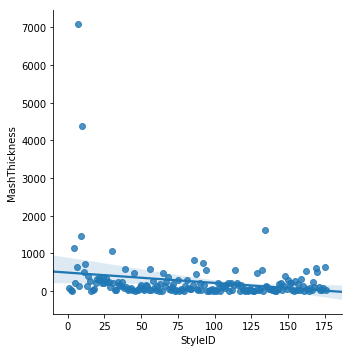

In [42]:
sns.lmplot(x = 'StyleID', y = 'MashThickness', data = beergroup)

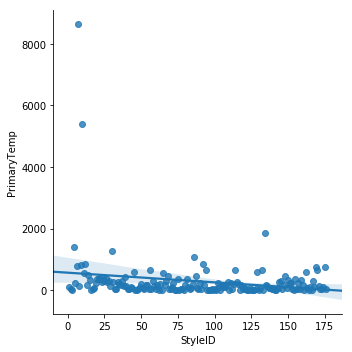

In [43]:
sns.lmplot(x = 'StyleID', y = 'PrimaryTemp', data = beergroup2)

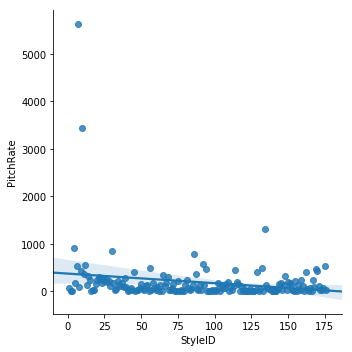

In [44]:
sns.lmplot(x = 'StyleID', y = 'PitchRate', data = beergroup3)

The available values for all of these seem to pretty consistent across styles. These columns could be useful. Let's do a correlation matrix to see if we actually need them.

In [45]:
beer.corr()

,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,PitchRate,PrimaryTemp
StyleID,1.000000,-0.006522,0.002699,0.007336,0.006617,-0.141124,0.166669,-0.006301,0.077969,0.002326,0.021515,0.006167,0.079123,-0.019661
Size(L),-0.006522,1.000000,0.162237,0.141614,-0.013527,-0.029917,-0.018068,0.994143,0.044848,0.176071,0.108826,0.019246,0.026623,0.004278
OG,0.002699,0.162237,1.000000,0.936347,0.029432,-0.001655,0.013632,0.165162,0.031825,0.968138,0.067610,0.046841,0.020556,0.000518
FG,0.007336,0.141614,0.936347,1.000000,0.026851,-0.000719,0.029848,0.142974,0.028930,0.908611,0.061173,0.040541,0.013446,0.004477
ABV,0.006617,-0.013527,0.029432,0.026851,1.000000,0.290889,0.271332,-0.009800,0.120629,0.025421,0.047853,-0.069633,0.132699,0.060065
IBU,-0.141124,-0.029917,-0.001655,-0.000719,0.290889,1.000000,0.060283,-0.028258,0.078694,-0.007498,-0.033172,-0.044381,0.006180,0.035510
Color,0.166669,-0.018068,0.013632,0.029848,0.271332,0.060283,1.000000,-0.016798,0.058089,0.013451,-0.017297,-0.038406,0.016061,0.025622
BoilSize,-0.006301,0.994143,0.165162,0.142974,-0.009800,-0.028258,-0.016798,1.000000,0.051219,0.175972,0.121971,0.017772,0.030936,0.003000
BoilTime,0.077969,0.044848,0.031825,0.028930,0.120629,0.078694,0.058089,0.051219,1.000000,0.026921,0.161295,0.006850,0.190922,-0.079809
BoilGravity,0.002326,0.176071,0.968138,0.908611,0.025421,-0.007498,0.013451,0.175972,0.026921,1.000000,0.059132,0.050944,0.016216,0.002268


These 3 columns don't seem to correlated strongly with anything else. I'll keep them.

(0, 10)

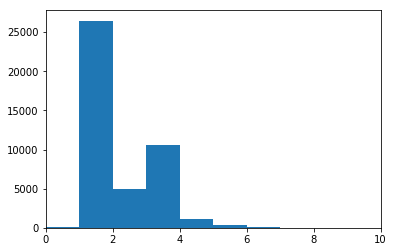

In [46]:
plt.hist(beer2['MashThickness'].dropna(),bins = 100)
plt.xlim(0,10)

{'boxes': [<matplotlib.lines.Line2D at 0x119345f60>],
 'caps': [<matplotlib.lines.Line2D at 0x1193509b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x119357668>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x119357240>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1193500f0>,
  <matplotlib.lines.Line2D at 0x119350588>]}

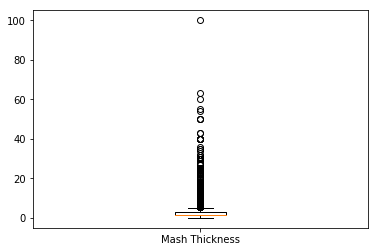

In [47]:
plt.boxplot(beer2['MashThickness'].dropna(), labels = ['Mash Thickness'])

MashThickness has a lot of really high outliers and the distribution is not normal. It probably makes more sense to replace nan values with the median than the mean.

In [48]:
np.median(beer2['MashThickness'].dropna())

1.5

The median for MashThickness is 1.5.

(array([4.4000e+01, 2.0000e+00, 3.0000e+00, 1.5000e+01, 3.5000e+01,
        5.0000e+00, 2.3000e+01, 5.0000e+00, 2.1000e+01, 1.0300e+02,
        2.0120e+03, 1.1590e+03, 2.2540e+03, 1.6954e+04, 2.2760e+04,
        4.5200e+03, 8.6600e+02, 1.3300e+02, 1.0000e+02, 6.0000e+00,
        1.6000e+01, 1.9000e+01, 1.0000e+00, 3.0000e+00, 2.0000e+00,
        6.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 5.0000e+00,
        3.0000e+00, 5.5000e+01, 3.3000e+01, 1.8000e+01, 4.0000e+00,
        4.0000e+00, 0.0000e+00, 5.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([-17.78  , -15.1444, -12.5088,  -9.8732,  -7.2376,  -4.602 ,
         -1.9664,   0.6692,   3.3048,   5.9404,   8.576 ,  11.2116,
         13.8472,  16.4828,  19.1184,  21.754 ,  24.3896,  27.0252,
         29.6608,  32.2964,  34.932 ,  37.5676,  40.2032,  42.8388,
         45.4744,  48.11  ,  50.7456,  53.3812

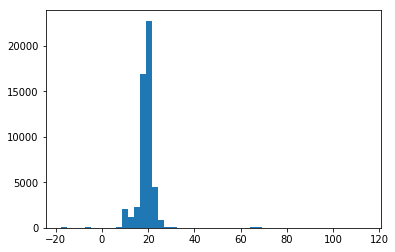

In [49]:
plt.hist(beer2['PrimaryTemp'].dropna(),bins = 50)


{'boxes': [<matplotlib.lines.Line2D at 0x119887e10>],
 'caps': [<matplotlib.lines.Line2D at 0x119891860>,
 'fliers': [<matplotlib.lines.Line2D at 0x11989a518>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11989a0f0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x119887f60>,
  <matplotlib.lines.Line2D at 0x119891438>]}

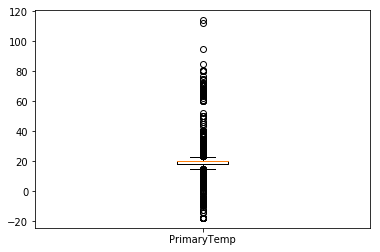

In [50]:
plt.boxplot(beer2['PrimaryTemp'].dropna(), labels = ['PrimaryTemp'])

In [51]:
np.median(beer2['PrimaryTemp'].dropna())

20.0

PrimaryTemp also has a lot of very high outliers. I'll replace nan values with the median.

(array([  51., 9477., 5469., 9002.,    0., 5194., 2405., 1838.,  533.,
         640.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

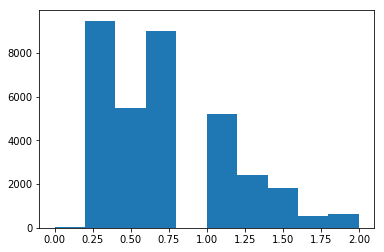

In [52]:
plt.hist(beer2['PitchRate'].dropna())

{'boxes': [<matplotlib.lines.Line2D at 0x118618f98>],
 'caps': [<matplotlib.lines.Line2D at 0x119528a20>,
 'fliers': [<matplotlib.lines.Line2D at 0x119532668>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x119532cc0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x118618fd0>,
  <matplotlib.lines.Line2D at 0x119528630>]}

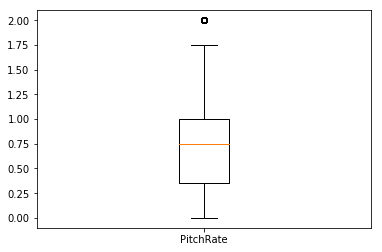

In [53]:
plt.boxplot(beer2['PitchRate'].dropna(), labels = ['PitchRate'])

In [54]:
np.median(beer2['PitchRate'].dropna())


0.75

In [55]:
np.mean(beer2['PitchRate'].dropna())

0.7504680863359242

I could use median or mean for PitchRate to replace the nan values.

In [56]:
beer2['PrimaryTemp2'] = beer2['PrimaryTemp'].fillna(20)

In [57]:
beer2['MashThickness2'] = beer2['MashThickness'].fillna(1.5)

In [58]:
beer2['PitchRate2'] = beer2['PitchRate'].fillna(0.75)

In [59]:
beer2 = beer2.drop(columns = ['MashThickness','PrimaryTemp','PitchRate'])

Finally I can drop all the empty fields from the 'kind' column I created and see how many rows I have left.

In [60]:
beer2.shape

(73861, 17)

In [61]:
beer3 = pd.DataFrame(beer2.dropna(how = 'any',axis = 0))

In [62]:
beer3.shape

(44574, 17)

In [63]:
beer3.tail()

,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,SugarScale,BrewMethod,kind,PrimaryTemp2,MashThickness2,PitchRate2
BeerID,,,,,,,,,,,,,,,,,
73854,7,18.93,1.073,1.018,7.15,0.00,6.01,22.71,60,1.060,70.0,Specific Gravity,BIAB,IPA,20.0,1.5,0.75
73855,10,18.93,1.064,1.016,6.26,0.00,9.60,28.39,60,1.042,75.0,Specific Gravity,BIAB,Pale Ales,20.0,1.5,0.75
73856,7,22.71,1.065,1.014,6.71,49.35,4.73,15.14,30,1.098,55.0,Specific Gravity,Partial Mash,IPA,20.0,1.5,0.50
73858,151,10.00,1.059,1.010,6.37,59.21,7.90,17.00,60,1.034,60.0,Specific Gravity,BIAB,IPA,22.0,1.5,0.50
73861,7,20.00,1.060,1.010,6.55,57.09,8.65,12.00,60,1.056,70.0,Specific Gravity,Partial Mash,IPA,18.0,1.5,0.75


In [64]:
beer3.corr()

,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,PrimaryTemp2,MashThickness2,PitchRate2
StyleID,1.000000,-0.004571,0.007070,0.012178,0.029073,-0.150490,0.202524,-0.003820,0.111609,0.006855,0.020540,0.029302,0.013358,0.037369
Size(L),-0.004571,1.000000,0.166321,0.146309,-0.011699,-0.039129,-0.015441,0.996071,0.048228,0.180824,0.114315,0.004438,0.042141,0.020152
OG,0.007070,0.166321,1.000000,0.946337,0.029093,-0.005517,0.021323,0.167403,0.033200,0.968738,0.072782,-0.001953,0.064330,0.014464
FG,0.012178,0.146309,0.946337,1.000000,0.030904,-0.004536,0.040777,0.147051,0.031400,0.917599,0.066330,0.001214,0.054657,0.009567
ABV,0.029073,-0.011699,0.029093,0.030904,1.000000,0.356536,0.279992,-0.007366,0.131360,0.024019,0.070063,0.028097,-0.051093,0.093388
IBU,-0.150490,-0.039129,-0.005517,-0.004536,0.356536,1.000000,0.026163,-0.037487,0.082257,-0.010083,-0.027372,0.013191,-0.050788,0.019402
Color,0.202524,-0.015441,0.021323,0.040777,0.279992,0.026163,1.000000,-0.014464,0.065437,0.018800,-0.013789,0.002208,-0.028759,0.025152
BoilSize,-0.003820,0.996071,0.167403,0.147051,-0.007366,-0.037487,-0.014464,1.000000,0.054212,0.179733,0.127678,0.003675,0.043336,0.022598
BoilTime,0.111609,0.048228,0.033200,0.031400,0.131360,0.082257,0.065437,0.054212,1.000000,0.029826,0.162957,-0.033404,0.042104,0.104345
BoilGravity,0.006855,0.180824,0.968738,0.917599,0.024019,-0.010083,0.018800,0.179733,0.029826,1.000000,0.062639,-0.000395,0.065424,0.013914


In [65]:
# BoilGravity , OG are very highly correlated with FG.
# BoilSize is too highly correlated with Size(L)
beer3 = pd.DataFrame(beer3.drop(columns = ['OG','BoilGravity','BoilSize']))

In [66]:
beer3.shape

(44574, 14)

In [67]:
beer3dum = pd.get_dummies(beer3.drop(columns = ['kind','StyleID']))

In [68]:
beer3dum.head()

,Size(L),FG,ABV,IBU,Color,BoilTime,Efficiency,PrimaryTemp2,MashThickness2,PitchRate2,SugarScale_Plato,SugarScale_Specific Gravity,BrewMethod_All Grain,BrewMethod_BIAB,BrewMethod_Partial Mash,BrewMethod_extract
BeerID,,,,,,,,,,,,,,,,
6,24.61,1.013,5.58,40.12,8.00,70,79.0,20.00,1.5,1.00,0,1,1,0,0,0
9,22.71,1.016,5.77,31.63,34.76,75,73.0,20.00,1.5,0.75,0,1,1,0,0,0
10,20.82,1.017,8.22,93.02,8.29,60,70.0,21.11,1.5,0.75,0,1,1,0,0,0
11,25.00,1.014,6.63,64.26,7.78,90,74.0,18.00,1.5,1.00,0,1,1,0,0,0
14,18.93,1.017,6.51,60.96,10.54,60,30.0,18.33,1.5,0.35,0,1,0,0,0,1


In [69]:
beer3dum.corr()

,Size(L),FG,ABV,IBU,Color,BoilTime,Efficiency,PrimaryTemp2,MashThickness2,PitchRate2,SugarScale_Plato,SugarScale_Specific Gravity,BrewMethod_All Grain,BrewMethod_BIAB,BrewMethod_Partial Mash,BrewMethod_extract
Size(L),1.000000,0.146309,-0.011699,-0.039129,-0.015441,0.048228,0.114315,0.004438,0.042141,0.020152,0.171074,-0.171074,0.092327,-0.060271,-0.025537,-0.048726
FG,0.146309,1.000000,0.030904,-0.004536,0.040777,0.031400,0.066330,0.001214,0.054657,0.009567,0.892947,-0.892947,0.071164,-0.042097,-0.020774,-0.042005
ABV,-0.011699,0.030904,1.000000,0.356536,0.279992,0.131360,0.070063,0.028097,-0.051093,0.093388,-0.009359,0.009359,0.031371,-0.021223,0.003524,-0.023512
IBU,-0.039129,-0.004536,0.356536,1.000000,0.026163,0.082257,-0.027372,0.013191,-0.050788,0.019402,-0.020165,0.020165,-0.006069,-0.012496,0.011084,0.016596
Color,-0.015441,0.040777,0.279992,0.026163,1.000000,0.065437,-0.013789,0.002208,-0.028759,0.025152,0.001910,-0.001910,0.009940,-0.009772,0.016984,-0.014040
BoilTime,0.048228,0.031400,0.131360,0.082257,0.065437,1.000000,0.162957,-0.033404,0.042104,0.104345,0.028288,-0.028288,0.158143,-0.024957,-0.059389,-0.165837
Efficiency,0.114315,0.066330,0.070063,-0.027372,-0.013789,0.162957,1.000000,-0.047256,0.097538,0.087321,0.073803,-0.073803,0.465694,0.098336,-0.113885,-0.730397
PrimaryTemp2,0.004438,0.001214,0.028097,0.013191,0.002208,-0.033404,-0.047256,1.000000,-0.001699,-0.160131,-0.003778,0.003778,-0.010831,-0.021711,0.013336,0.033059
MashThickness2,0.042141,0.054657,-0.051093,-0.050788,-0.028759,0.042104,0.097538,-0.001699,1.000000,0.012880,0.071384,-0.071384,0.206538,-0.133853,-0.063196,-0.106258
PitchRate2,0.020152,0.009567,0.093388,0.019402,0.025152,0.104345,0.087321,-0.160131,0.012880,1.000000,0.010100,-0.010100,0.065293,-0.003721,-0.030767,-0.072231


In [70]:
#The Sugarscales are too strongly correlated with FG.
beer3dum = pd.DataFrame(beer3dum.drop(columns = ['SugarScale_Specific Gravity','SugarScale_Plato']))

In [71]:
#beer3dum = pd.DataFrame(beer3dum.drop(columns = ['BrewMethod_All Grain','BrewMethod_BIAB','BrewMethod_Partial Mash','BrewMethod_extract']))

In [72]:
beer3dum.shape

(44574, 14)

In [73]:
exes = beer3dum
columns = exes.columns
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(exes)
scaled_df = pd.DataFrame(scaled_df, columns = columns)
scaled_df.columns


Index(['Size(L)', 'FG', 'ABV', 'IBU', 'Color', 'BoilTime', 'Efficiency',
       'PrimaryTemp2', 'MashThickness2', 'PitchRate2', 'BrewMethod_All Grain',
       'BrewMethod_BIAB', 'BrewMethod_Partial Mash', 'BrewMethod_extract'],
      dtype='object')

In [74]:
beer3['kind'].unique()

array(['Pale Ales', 'Stout-Porter', 'IPA', 'Lager', 'Weissbier',
       'Light Lager'], dtype=object)

In [75]:
y = np.ravel(beer3['kind'])
y = y.astype(str)
X = np.asarray(scaled_df)


In [76]:
# Declare a logistic regression classifier.
# Parameter regularization coefficient C described above.
lr = LogisticRegression(C = 1e6)


In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20)

##Fit the model.
fit = lr.fit(X_train, Y_train)


In [79]:
# Display.


print('Coefficients') 
print(fit.coef_)
print('Intercepts')
print (fit.intercept_)
pred_y_sklearn = lr.predict(X_test)
pred_y_sklearn = lr.predict(X_train)
print('\n Percentage accuracy')
print('Test',lr.score(X_test, Y_test))
print('Train',lr.score(X_train, Y_train))


Coefficients
[[ 1.43306743e+00  1.69426909e-01  1.51173958e+01  1.62671986e+02
  -4.38428012e+00 -2.09400187e+00 -3.93038800e-01 -8.53832673e-02
  -1.73084072e-01 -7.35161000e-01 -3.73815815e-01 -4.77080424e-01
  -5.63578600e-01 -6.79106604e-01]
 [ 5.79171631e-01  1.76251125e-02 -6.60626765e+00 -7.92232548e+01
  -1.96665344e+00 -8.68790076e-01 -2.43105502e-01 -2.08029169e+01
  -7.28784184e-01  3.66568255e+00  1.10927195e+00  9.95713731e-01
   1.31406496e+00  1.25751292e+00]
 [ 3.78598531e+00  3.07346971e-01 -7.95967474e-01 -9.74662267e+01
  -1.16307526e+00 -4.15350515e+00 -8.27770213e-01 -2.15433565e-01
   4.53800398e-01  1.07081913e+00  2.38813476e-02 -6.95851327e-02
  -8.12398024e-02 -3.88503925e-02]
 [-3.05198174e+00 -9.87035443e-01 -1.32039282e+01 -3.86401584e+01
  -4.34645923e+00  3.44091550e-01  1.34187961e+00  8.21831278e+00
   1.04319422e+00 -1.41583300e+00 -4.19252335e-01 -3.02613270e-01
  -3.21243288e-01 -1.85457006e-01]
 [-2.07008948e+00  1.30213910e+00 -8.86871762e+00 -9.17

In [81]:
Coefficients = pd.DataFrame(fit.coef_,columns = beer3dum.columns, index = fit.classes_)
Coefficients['Intercepts']=fit.intercept_
print('Coefficients')
Coefficients

Coefficients


,Size(L),FG,ABV,IBU,Color,BoilTime,Efficiency,PrimaryTemp2,MashThickness2,PitchRate2,BrewMethod_All Grain,BrewMethod_BIAB,BrewMethod_Partial Mash,BrewMethod_extract,Intercepts
IPA,1.433067,0.169427,15.117396,162.671986,-4.384280,-2.094002,-0.393039,-0.085383,-0.173084,-0.735161,-0.373816,-0.477080,-0.563579,-0.679107,-2.093581
Lager,0.579172,0.017625,-6.606268,-79.223255,-1.966653,-0.868790,-0.243106,-20.802917,-0.728784,3.665683,1.109272,0.995714,1.314065,1.257513,4.676564
Light Lager,3.785985,0.307347,-0.795967,-97.466227,-1.163075,-4.153505,-0.827770,-0.215434,0.453800,1.070819,0.023881,-0.069585,-0.081240,-0.038850,-0.165794
Pale Ales,-3.051982,-0.987035,-13.203928,-38.640158,-4.346459,0.344092,1.341880,8.218313,1.043194,-1.415833,-0.419252,-0.302613,-0.321243,-0.185457,-1.228566
Stout-Porter,-2.070089,1.302139,-8.868718,-91.713465,11.994424,2.117501,1.319026,-1.248276,-3.178384,-0.193700,-1.366948,-1.287482,-0.910679,-0.512914,-4.078023
Weissbier,-6.352989,0.935101,-4.032670,-266.846703,-6.578512,5.082930,-0.789842,2.057130,2.529802,-2.881921,0.166744,0.244462,0.340932,-0.243370,0.508767


In [ ]:
#freq = pd.DataFrame(beerna2['StyleID'].value_counts().reset_index())
#freqcut = pd.DataFrame(freq[freq['StyleID'] > 5])
#freqcut['index'].unique()

In [ ]:
#freqcut['index'].nunique()

In [ ]:
#beerna2cut = pd.DataFrame(beerna2.loc[beerna2['StyleID'].isin(freqcut['index'].unique())])
#beerna2cut['StyleID'].nunique()

In [82]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score


In [83]:
rfc = ensemble.RandomForestClassifier(n_jobs = -1)
y = np.ravel(beer3['kind'])
X = pd.DataFrame(beer3dum)


In [84]:
cross_val_score(rfc,X,y,cv=5)

array([0.76171787, 0.74248542, 0.73390173, 0.74520364, 0.73589139])

In [85]:
rfc.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

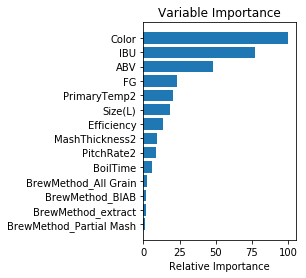

In [86]:

feature_importance = rfc.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [131]:
ipagroup = pd.DataFrame(beer3.loc[beer3.kind == 'IPA',:])

In [132]:
palegroup = pd.DataFrame(beer3.loc[beer3.kind == 'Pale Ales',:])

In [133]:
lagergroup = pd.DataFrame(beer3.loc[beer3.kind == 'Lager',:])

In [134]:
lightgroup = pd.DataFrame(beer3.loc[beer3.kind == 'Light Lager',:])

In [135]:
weissgroup = pd.DataFrame(beer3.loc[beer3.kind == 'Weissbier',:])

In [136]:
stoutgroup = pd.DataFrame(beer3.loc[beer3.kind == 'Stout-Porter',:])

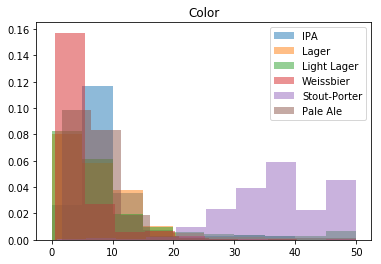

In [155]:
plt.hist(ipagroup['Color'],alpha = .5,normed = True)
plt.hist(lagergroup['Color'], alpha = .5, normed = True)
plt.hist(lightgroup['Color'], alpha = .5, normed = True)
plt.hist(weissgroup['Color'], alpha = .5, normed = True)
plt.hist(stoutgroup['Color'], alpha = .5, normed = True)
plt.hist(palegroup['Color'], alpha = .5, normed = True)
plt.legend(labels = ['IPA','Lager','Light Lager','Weissbier','Stout-Porter','Pale Ale'])
plt.title('Color')
plt.show()

Stout really stands out here, but you can also differentiat IPA and Weissbier very well. The Lagers and Pale Ale are jumbled up in the middle.

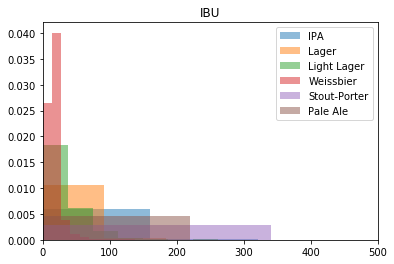

In [154]:
plt.hist(ipagroup['IBU'],alpha = .5, normed = True)
plt.hist(lagergroup['IBU'], alpha = .5, normed = True)
plt.hist(lightgroup['IBU'], alpha = .5, normed = True)
plt.hist(weissgroup['IBU'], alpha = .5, normed = True)
plt.hist(stoutgroup['IBU'], alpha = .5, normed = True)
plt.hist(palegroup['IBU'], alpha = .5, normed = True)
plt.legend(labels = ['IPA','Lager','Light Lager','Weissbier','Stout-Porter','Pale Ale'])
plt.xlim(0,500)
plt.title('IBU')
plt.show()

Here the beers show their varations with bitterness going from the highest to lowest as follows: Stout, Pale Ale, IPA, Lagers, and Weissbier.

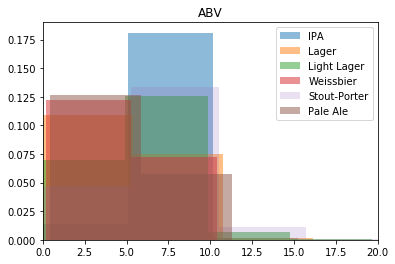

In [161]:
plt.hist(ipagroup['ABV'],alpha = .5, normed = True)
plt.hist(lagergroup['ABV'], alpha = .5, normed = True)
plt.hist(lightgroup['ABV'], alpha = .5, normed = True)
plt.hist(weissgroup['ABV'], alpha = .5, normed = True)
plt.hist(stoutgroup['ABV'], alpha = .2, normed = True)
plt.hist(palegroup['ABV'], alpha = .5, normed = True)
plt.legend(labels = ['IPA','Lager','Light Lager','Weissbier','Stout-Porter','Pale Ale'])
plt.xlim(0,20)
plt.title('ABV')
plt.show()
#Light lager is hiding behind the stouts.

Light lager has a higher alcohol by volume than regular lager. That is a suprise. Once again IPA stands out, this time with its unusually high alcohol by volume.

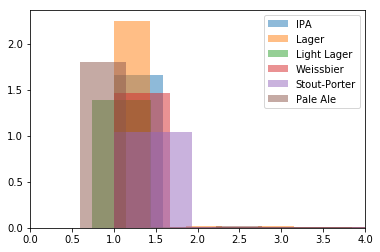

In [160]:
plt.hist(ipagroup['FG'],alpha = .5, normed = True)
plt.hist(lagergroup['FG'], alpha = .5, normed = True)
plt.hist(lightgroup['FG'], alpha = .5, normed = True)
plt.hist(weissgroup['FG'], alpha = .5, normed = True)
plt.hist(stoutgroup['FG'], alpha = .5, normed = True)
plt.hist(palegroup['FG'], alpha = .5, normed = True)
plt.legend(labels = ['IPA','Lager','Light Lager','Weissbier','Stout-Porter','Pale Ale'])
plt.xlim(0,4)
plt.show()
#Outliers above 4 are cut off.

Pale Ales are clearly lower in gravity than all the others. The lager stands out for it's central location and lack of variance.

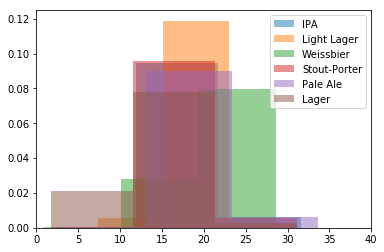

In [166]:
plt.hist(ipagroup['PrimaryTemp2'],alpha = .5, normed = True)
plt.hist(lightgroup['PrimaryTemp2'], alpha = .5, normed = True)
plt.hist(weissgroup['PrimaryTemp2'], alpha = .5, normed = True)
plt.hist(stoutgroup['PrimaryTemp2'], alpha = .5, normed = True)
plt.hist(palegroup['PrimaryTemp2'], alpha = .5, normed = True)
plt.hist(lagergroup['PrimaryTemp2'], alpha = .5, normed = True)
plt.legend(labels = ['IPA','Light Lager','Weissbier','Stout-Porter','Pale Ale','Lager'])
plt.xlim(0,40)
plt.show()

Finally the lager stands out a bit. It has some unusually low primary temperatures because the fermentation is on the bottom but it also has central temperatures that mix it in with IPAs, and Pale Ales. The Weissbier stands out the most in this plot, for its high temperatures.

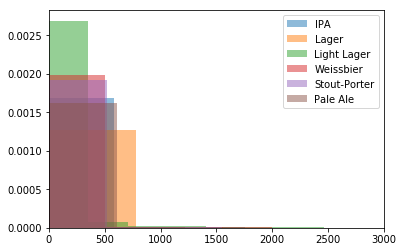

In [153]:
plt.hist(ipagroup['Size(L)'],alpha = .5, normed = True)
plt.hist(lagergroup['Size(L)'], alpha = .5, normed = True)
plt.hist(lightgroup['Size(L)'], alpha = .5, normed = True)
plt.hist(weissgroup['Size(L)'], alpha = .5, normed = True)
plt.hist(stoutgroup['Size(L)'], alpha = .5, normed = True)
plt.hist(palegroup['Size(L)'], alpha = .5, normed = True)
plt.legend(labels = ['IPA','Lager','Light Lager','Weissbier','Stout-Porter','Pale Ale'])
plt.xlim(0,3000)
plt.show()

The light lager has smaller mash volumes (low cal) and the regular lager has larger volumes.

In [ ]:
# Create training and test sets.
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set.
X_test, y_test = X[offset:], y[offset:]

In [ ]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params,subsample=.8)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)



In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, predict_train, normalize=True, sample_weight=None)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predict_test, normalize=True, sample_weight=None)